Project Topic
Is there a clear explanation of what this project is about? Does it state clearly which type of problem? E.g. type of learning and type of the task.
Is the goal of the project clearly stated? E.g. why it’s important, what goal the author wants to achieve, or wants to learn.
# Unlocking the Key to Finding Your Match

## Introduction
Struggling to find a match in the modern dating scene, I became determined to uncover the secret to success. My mom always assured me I was handsome, so looks couldn't be the issue. Could it be because I'm under 6 feet tall? My ethnicity? Or maybe my job title? Armed with my newfound knowledge of machine learning, I set out to dive deep into dating data and discover the hidden ingredients for finding my perfect match.

## Project Topic
Understanding the factors that lead to success on a second date can provide valuable insights into what I need to improve to find my ideal match. In this analysis, I employed several supervised machine learning algorithms, including logistic regression, random forest, and gradient boosting models, to predict the traits that make each gender more attractive for a match. The dataset used for this analysis includes various attributes related to dating. By training predictive models on this data, I aim not only to enhance my knowledge of machine learning but also to apply these findings to my personal quest for the perfect match.

## About The Data
The data I used is from Speed Dating dataset from Kaggle: https://www.kaggle.com/annavictoria/speed-dating-experiment
The data was gathered from 552 participants in experimental speed dating events from 2002-2004.
During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex.
At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes:
- Attractiveness
- Sincerity
- Intelligence
- Fun
- Ambition
- Shared Interests.

The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include:
- demographics
- dating habits
- self-perception across key attributes
- beliefs on what others find valuable in a mate
- lifestyle information


# Import Packages

In [84]:
# importing packages

import pandas as pd
import numpy as np
import seaborn as sns
pd.options.display.max_rows = 1000 #shows truncated results
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, make_scorer, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Initial Look
Conduct an initial assessment of the data type and its size. The speed dating data is found in a csv file(5.2 MB). See the speed-dating-data-key.doc for data dictionary and question key.

In [55]:
# importing data
speed_dating_events_data = pd.read_csv('data/speed_dating_data.csv', encoding="ISO-8859-1") # this encoding handles reading non-ASCII characters. 
speed_dating_events_data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [56]:
#To identify the data types and size of the data
speed_dating_events_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


## Data Cleaning
 There are 8378 rows of dating data with 195 columns. Many columns are resulted from 3 surveys asking participants same questions. The first survey, which was the survey filled out by students that are interested in participating in order to register for the event, was filled out completely which explains very few NaN in those columns. However, in subsequent follow up surveys, few participants responded which explains extensive amount of NaN in those columns.  
 Due to hundreds of columns, instead of dropping columns from original dataframe, I have decided to create multiple dataframes for analysis by extracting essential columns from original dataframe.

In [57]:
# counting null values
speed_dating_events_data.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
wave           0
round          0
position       0
positin1    1846
order          0
partner        0
pid           10
match          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
dec_o          0
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
like_o       250
prob_o       318
met_o        385
age           95
field         63
field_cd      82
undergra    3464
mn_sat      5245
tuition     4795
race          63
imprace       79
imprelig      79
from          79
zipcode     1064
income      4099
goal          79
date          97
go_out        79
career        89
career_c     138
sports        79
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      

It is important to notice that each participant is in the dataframe multiple times, once for each opposite gender participant. Thus an exploratory analysis on this dataset would be on 8378 individuals with many many repetitions.

In other words, if I am Goku and I participate to a wave(speed dating event) with 10 participants of the opposite gender, I count as 10 Goku people. This can bias the analysis and therefore I want to create a second dataframe with only the unique entries, giving us the real number of participants: 551.

In [58]:
personal_attributes = ['gender', 'age', 'field',
       'race', 'imprace', 'imprelig', 'from',
       'income', 'goal', 'date', 'go_out', 'career',
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
       'expnum','match_es']
decision = ['match','dec',
       'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob',
       'met']
evaluation = ['satis_2', 'length', 'numdat_2']

In [59]:
speed_dating_events_analysis_data= speed_dating_events_data[['iid', 'wave'] + personal_attributes + evaluation].drop_duplicates().copy()
len(speed_dating_events_analysis_data)

551

In [60]:
speed_dating_events_analysis_data.head()

,iid,wave,gender,age,field,race,imprace,imprelig,from,income,...,concerts,music,shopping,yoga,exphappy,expnum,match_es,satis_2,length,numdat_2
0,1,1,0,21.0,Law,4.0,2.0,4.0,Chicago,"69,487.00",...,10.0,9.0,8.0,1.0,3.0,2.0,4.0,6.0,2.0,1.0
10,2,1,0,24.0,law,2.0,2.0,5.0,Alabama,"65,929.00",...,7.0,8.0,3.0,1.0,4.0,5.0,3.0,5.0,2.0,NaN
20,3,1,0,25.0,Economics,2.0,8.0,4.0,Connecticut,NaN,...,7.0,5.0,8.0,7.0,4.0,2.0,NaN,NaN,NaN,NaN
30,4,1,0,23.0,Law,2.0,1.0,1.0,Texas,"37,754.00",...,8.0,7.0,1.0,8.0,1.0,2.0,2.0,4.0,3.0,2.0
40,5,1,0,21.0,Law,2.0,8.0,1.0,Bowdoin College,"86,340.00",...,3.0,7.0,8.0,3.0,7.0,10.0,NaN,7.0,2.0,2.0


## Exploratory Data Analysis

### Who are the partipants?
Here, I explore the dataset in terms of those features that describe the participants. The goals are to get to know what is in this dataset and get some hints on what to focus on for further analysis.

These speed dating events were dedicated to partners of opposite genders.

In [61]:
speed_dating_events_analysis_data['gender'] = speed_dating_events_analysis_data.gender.map({1 : 'Male', 0 : 'Female'}).fillna(speed_dating_events_analysis_data.gender)
speed_dating_events_data['gender'] = speed_dating_events_data.gender.map({1 : 'Male', 0 : 'Female'}).fillna(speed_dating_events_data.gender)
speed_dating_events_analysis_data.gender.value_counts(dropna=False)

gender
Male      277
Female    274
Name: count, dtype: int64

There is slightly more male than female, but it's almost half half. So I can say this dataset doesn't have gender biased.
Now let's observe the dataset in details. Look at the age distribution of the participants.

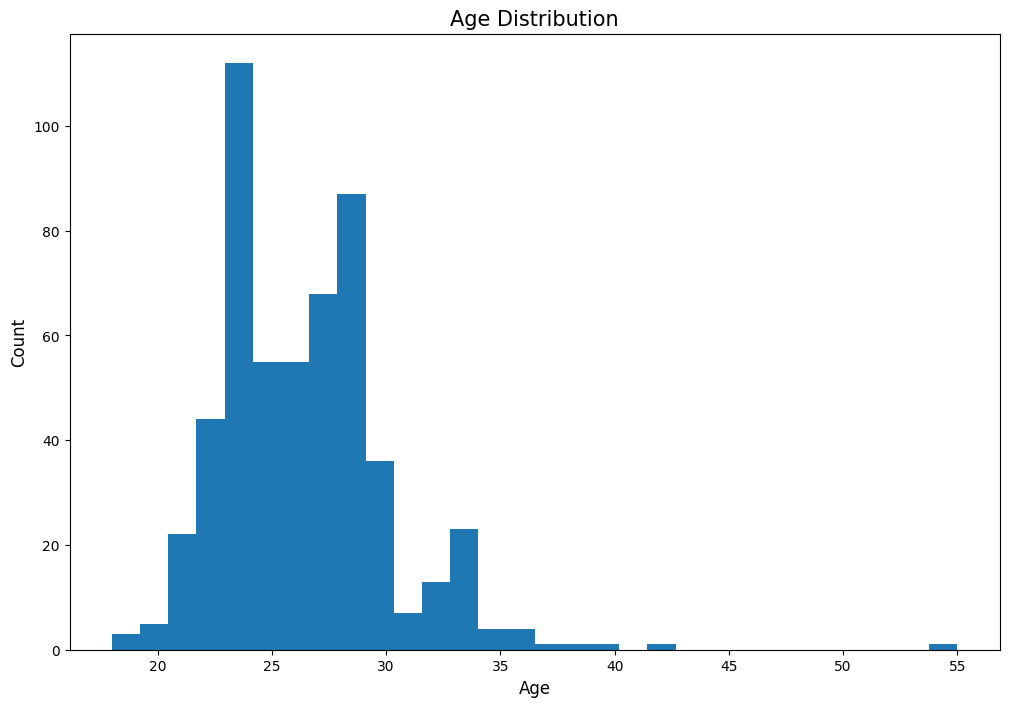

In [62]:
ax = speed_dating_events_analysis_data.age.hist(bins=30, figsize=(12,8))
ax.set_title('Age Distribution', fontsize=15)
ax.set_xlabel('Age',fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.grid(False)

We can see that the age of the participants are heavily concentred from age 20 to 30. This make sense since participants are mostly students.
Here is the race distribution.

In [63]:
speed_dating_events_analysis_data['race'] = speed_dating_events_analysis_data.race.map({1: 'Black', 2: 'White', 3: 'Hispanic', 
                          4: 'Asian', 6: 'Other'}).fillna(speed_dating_events_analysis_data.race)
speed_dating_events_data['race'] = speed_dating_events_data.race.map({1: 'Black', 2: 'White', 3: 'Hispanic', 
                          4: 'Asian', 6: 'Other'}).fillna(speed_dating_events_data.race)
speed_dating_events_data['race_o'] = speed_dating_events_data.race_o.map({1: 'Black', 2: 'White', 3: 'Hispanic', 
                          4: 'Asian', 6: 'Other'}).fillna(speed_dating_events_data.race_o)
speed_dating_events_analysis_data.race.value_counts(dropna=False)

race
White       304
Asian       136
Hispanic     42
Other        37
Black        26
NaN           6
Name: count, dtype: int64

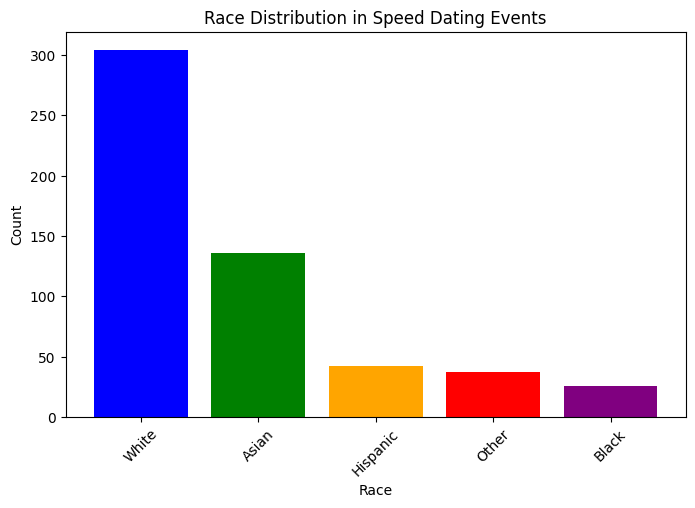

In [64]:
# To display in bar graph
# NaN will be ignored here as very small number of field was NaN
race_counts = {'White': 304, 'Asian': 136, 'Hispanic': 42, 'Other': 37, 'Black': 26 }

# Create bar graph
plt.figure(figsize=(8, 5))
plt.bar(race_counts.keys(), race_counts.values(), color=['blue', 'green', 'orange', 'red', 'purple', 'grey'])

# Add labels and title
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Race Distribution in Speed Dating Events')
plt.xticks(rotation=45)

# Display the graph
plt.show()

The speed dating events were probably held at specific location with various demographics. But as you can see the participants are white dominant. 
### How important is the race?
I live in multicultural city Toronto so I was always curious about how race plays role in selecting potential match.
This is the result from the initial sign up survey when asked how important is the race.

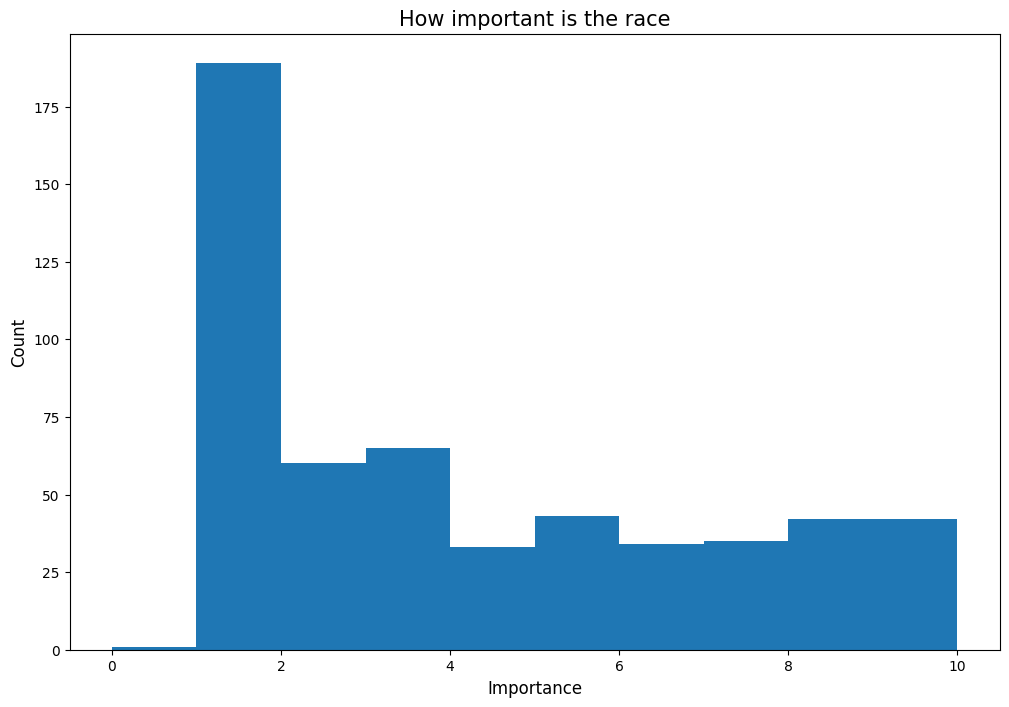

In [65]:
ax = speed_dating_events_analysis_data.imprace.hist(bins=10, figsize=(12,8))
ax.set_title('How important is the race', fontsize=15)
ax.set_xlabel('Importance',fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.grid(False)

In general, the participants indicate that the race isn't important when picking a partner. How about if I break this down by race?

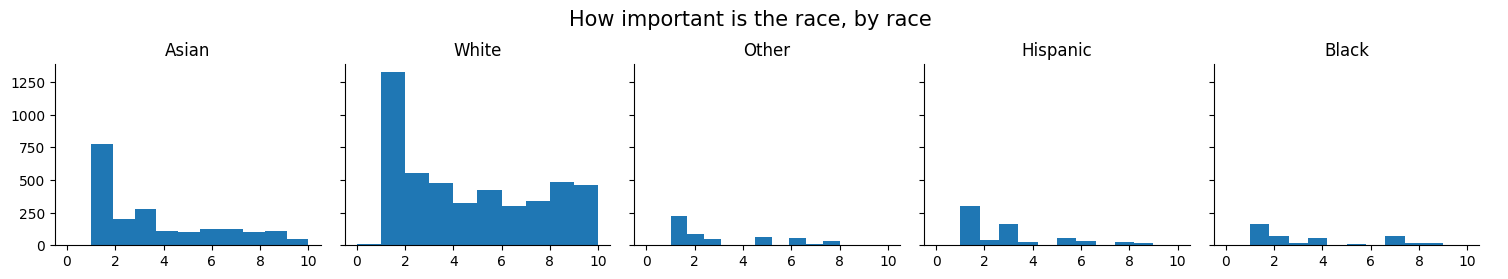

In [66]:
g = sns.FacetGrid(speed_dating_events_data, col='race')
g.map(plt.hist, 'imprace', bins=10)
axes = g.axes.flatten()
axes[0].set_title("Asian")
axes[1].set_title("White")
axes[2].set_title("Other")
axes[3].set_title("Hispanic")
axes[4].set_title("Black")
g.set_xlabels('', fontsize=1)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How important is the race, by race', fontsize=15)
g.add_legend()

All the races are showing similar pattern where they all indicating dating different race is not an important factor.
Let's explore correlation analysis to observe correlation between those who found a match and other attributes.
For correlation analysis, I have added `match_found` column which is participants who found match and also added `attr_rating` which is the average of rating by partners at the night of the event.
I wanted to find out for those who found a match, what they have in common. 

In [67]:
# Create a boolean series where True indicates at least one match (1) for each iid
iid_match_mapping = speed_dating_events_data.groupby('iid')['match'].any().astype(int)

# Map this series to speed_dating_events_analysis_data based on 'iid' and add a new column 'match_found'
speed_dating_events_analysis_data['match_found'] = speed_dating_events_analysis_data['iid'].map(iid_match_mapping).fillna(0).astype(int)

# Now, speed_dating_events_analysis_data contains the new 'match_found' column with 1 or 0.

# Calculate the average attr_o for each iid in speed_dating_events_data
avg_attr_o = speed_dating_events_data.groupby('iid')['attr_o'].mean().reset_index()

# Rename the column to 'attr_rating' for easier merging
avg_attr_o.rename(columns={'attr_o': 'attr_rating'}, inplace=True)

# Merge the average attr_rating with speed_dating_events_analysis_data based on 'iid'
speed_dating_events_analysis_data = speed_dating_events_analysis_data.merge(avg_attr_o, on='iid', how='left')

# Find the number of unique 'iid' values where 'match_found' is 1
num_iid_with_match_found = speed_dating_events_analysis_data[speed_dating_events_analysis_data['match_found'] == 1]['iid'].nunique()
speed_dating_events_analysis_data.head() 

,iid,wave,gender,age,field,race,imprace,imprelig,from,income,...,shopping,yoga,exphappy,expnum,match_es,satis_2,length,numdat_2,match_found,attr_rating
0,1,1,Female,21.0,Law,Asian,2.0,4.0,Chicago,"69,487.00",...,8.0,1.0,3.0,2.0,4.0,6.0,2.0,1.0,1,6.7
1,2,1,Female,24.0,law,White,2.0,5.0,Alabama,"65,929.00",...,3.0,1.0,4.0,5.0,3.0,5.0,2.0,NaN,1,7.7
2,3,1,Female,25.0,Economics,White,8.0,4.0,Connecticut,NaN,...,8.0,7.0,4.0,2.0,NaN,NaN,NaN,NaN,0,6.5
3,4,1,Female,23.0,Law,White,1.0,1.0,Texas,"37,754.00",...,1.0,8.0,1.0,2.0,2.0,4.0,3.0,2.0,1,7.0
4,5,1,Female,21.0,Law,White,8.0,1.0,Bowdoin College,"86,340.00",...,8.0,3.0,7.0,10.0,NaN,7.0,2.0,2.0,1,5.3


Dataframe has been updated and is ready for correlation analysis. But before out of curiousity I wanted to know how many participants found a match.

In [68]:
print(f'Number of unique iids with match_found = 1: {num_iid_with_match_found}')
#out of 551

Number of unique iids with match_found = 1: 452


So 452 out of 551 participants were able to find a match. That's 82% rate! Considering each of 21 speed dating event had opposite gender participation of 18 ,22, 16, it was likely that each participant would find a match from short initial interaction.
For the following heatmap analysis, I took columns with numeric values. So column like `career` unfortunately wasn't included as value for `career` is string. 

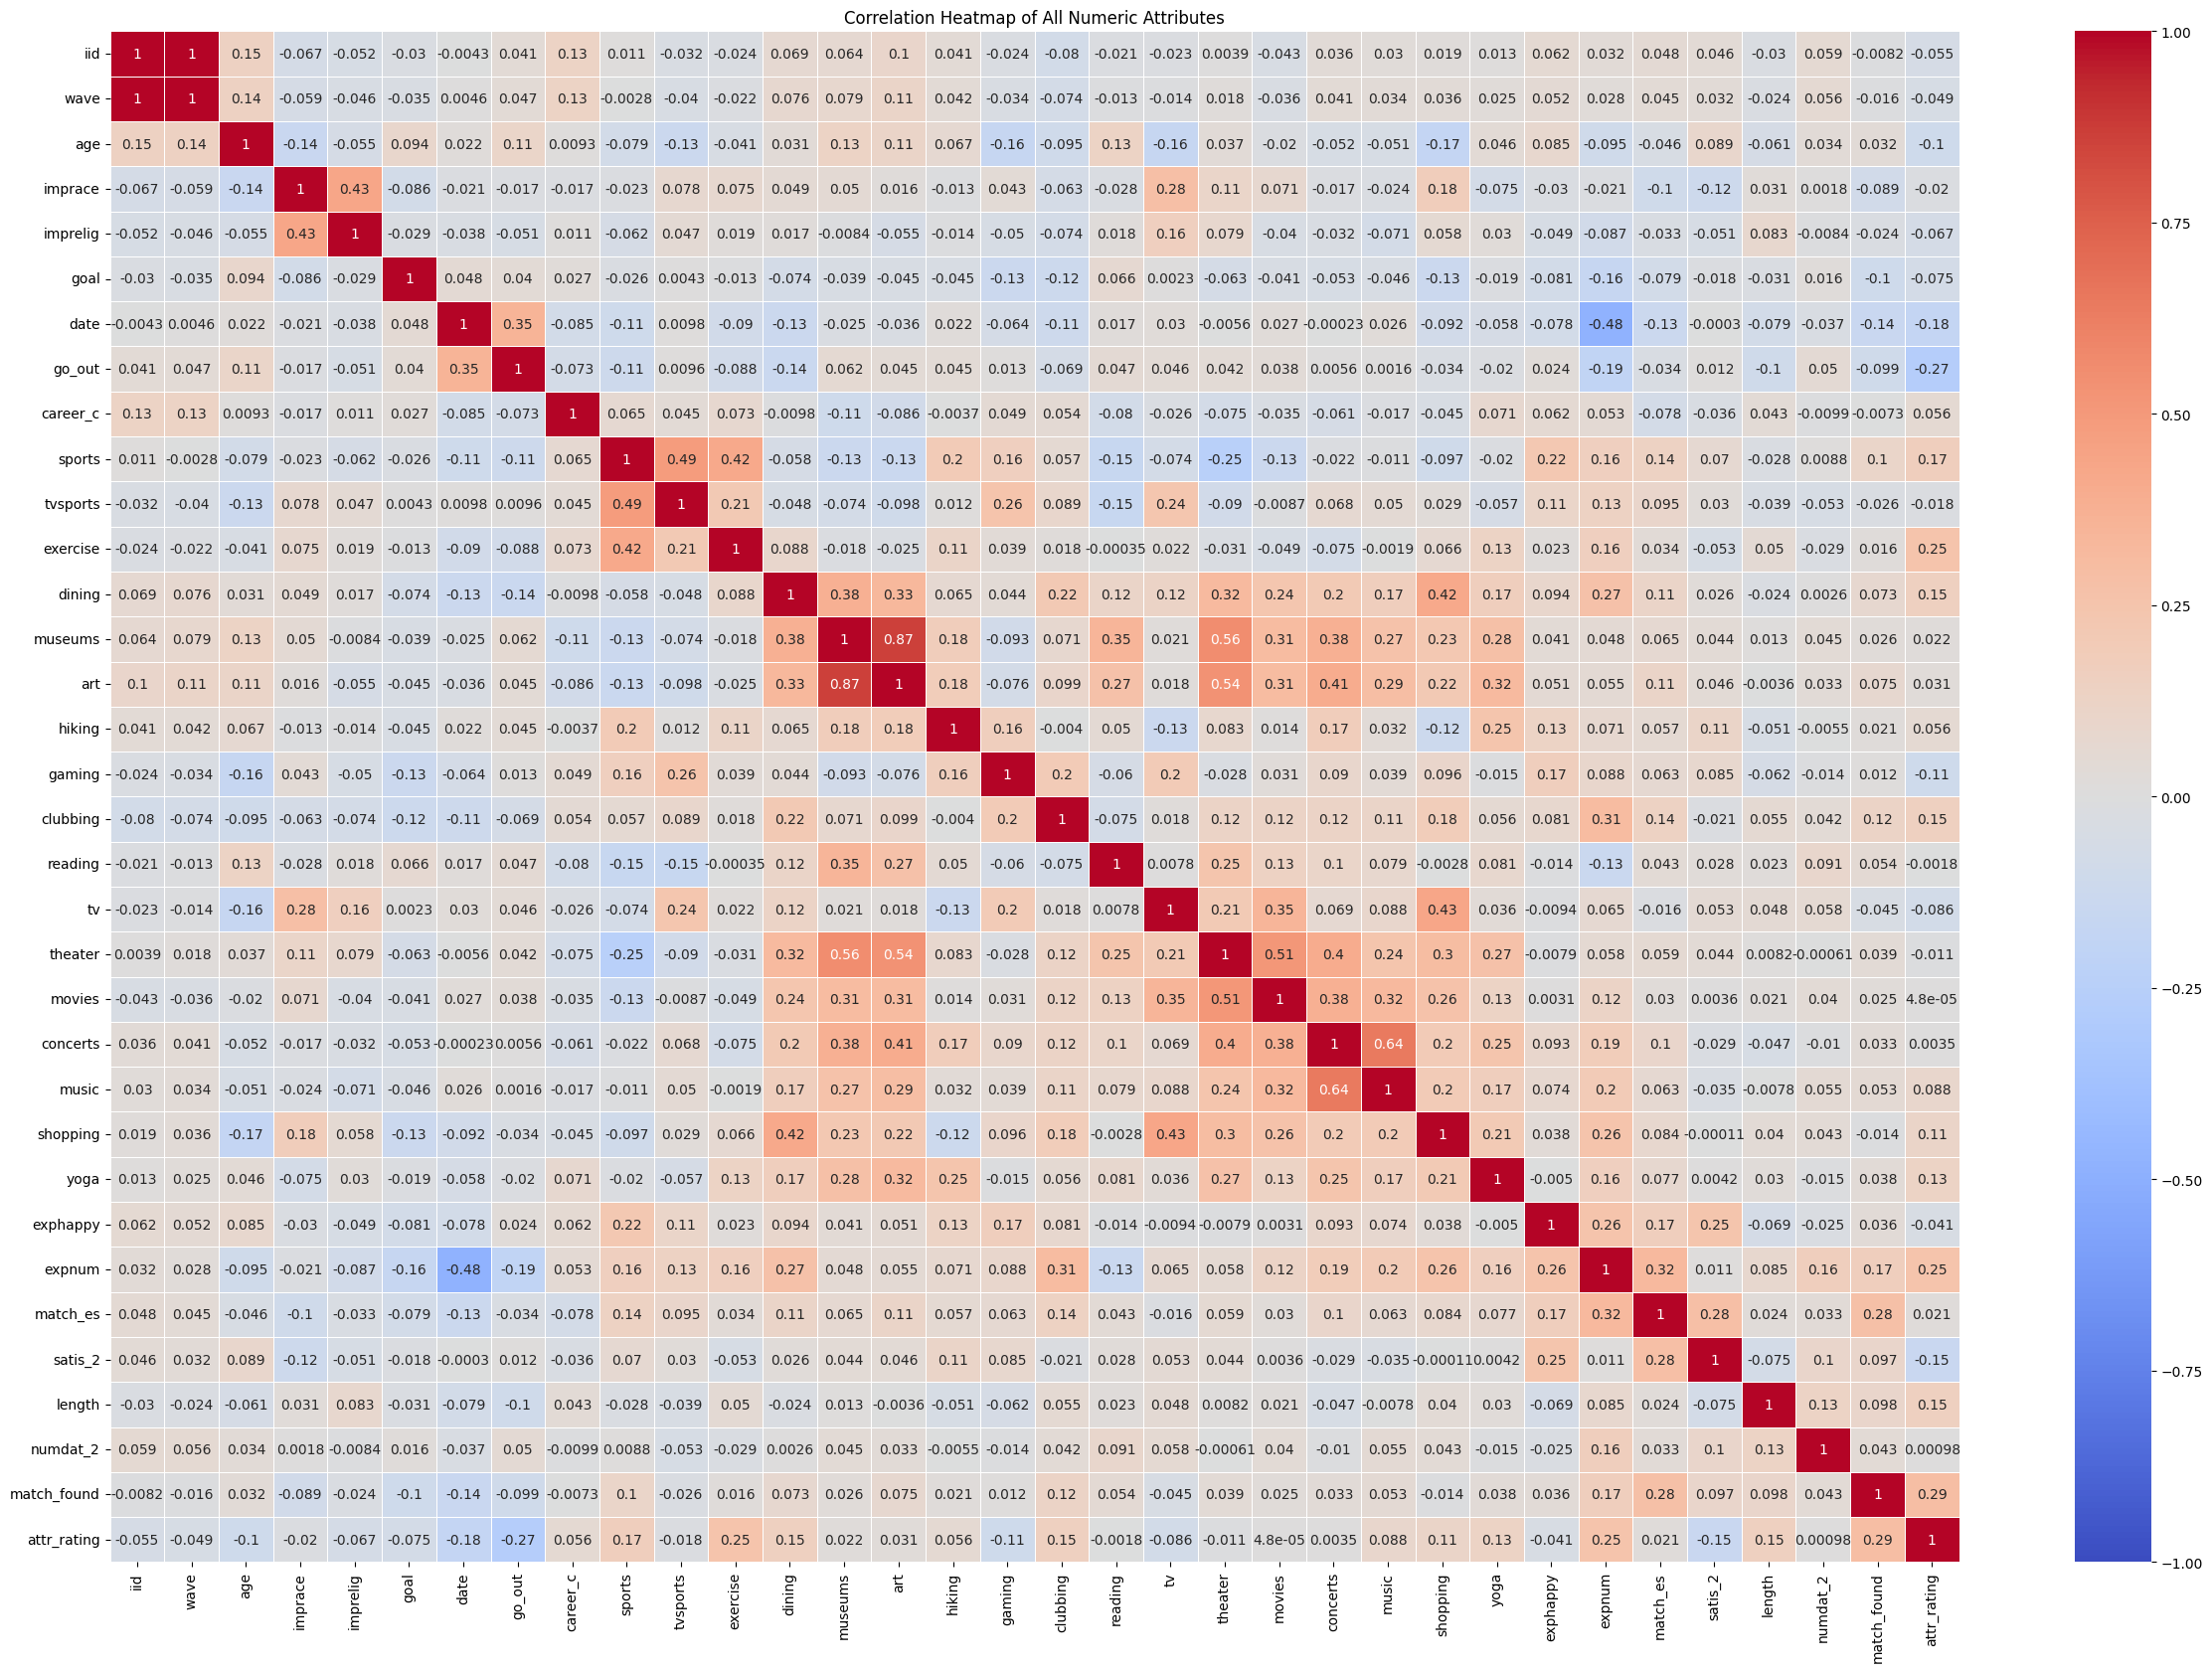

In [69]:
# Step 1: Select only the numeric columns from speed_dating_events_analysis_data
numeric_columns = speed_dating_events_analysis_data.select_dtypes(include='number')

# Step 2: Calculate the correlation matrix for all numeric columns
correlation_matrix = numeric_columns.corr()

# Step 3: Plot the heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

# Add labels and title
plt.title('Correlation Heatmap of All Numeric Attributes')
plt.show()


As expected `art` and `museum` show very strong correlation of 0.87 so that means this heatmap is working. As for `match_found`, `attr_rating` had the strongest correlation, which means those who scored high in attraction rating by their partner also had highest chance of finding a match. The second highest correlation to `attr_rating` was `exercise`, which translates those who workout had the higher attraction rating. 
Just out of curiousity, let's see if income plays a role in finding a match.

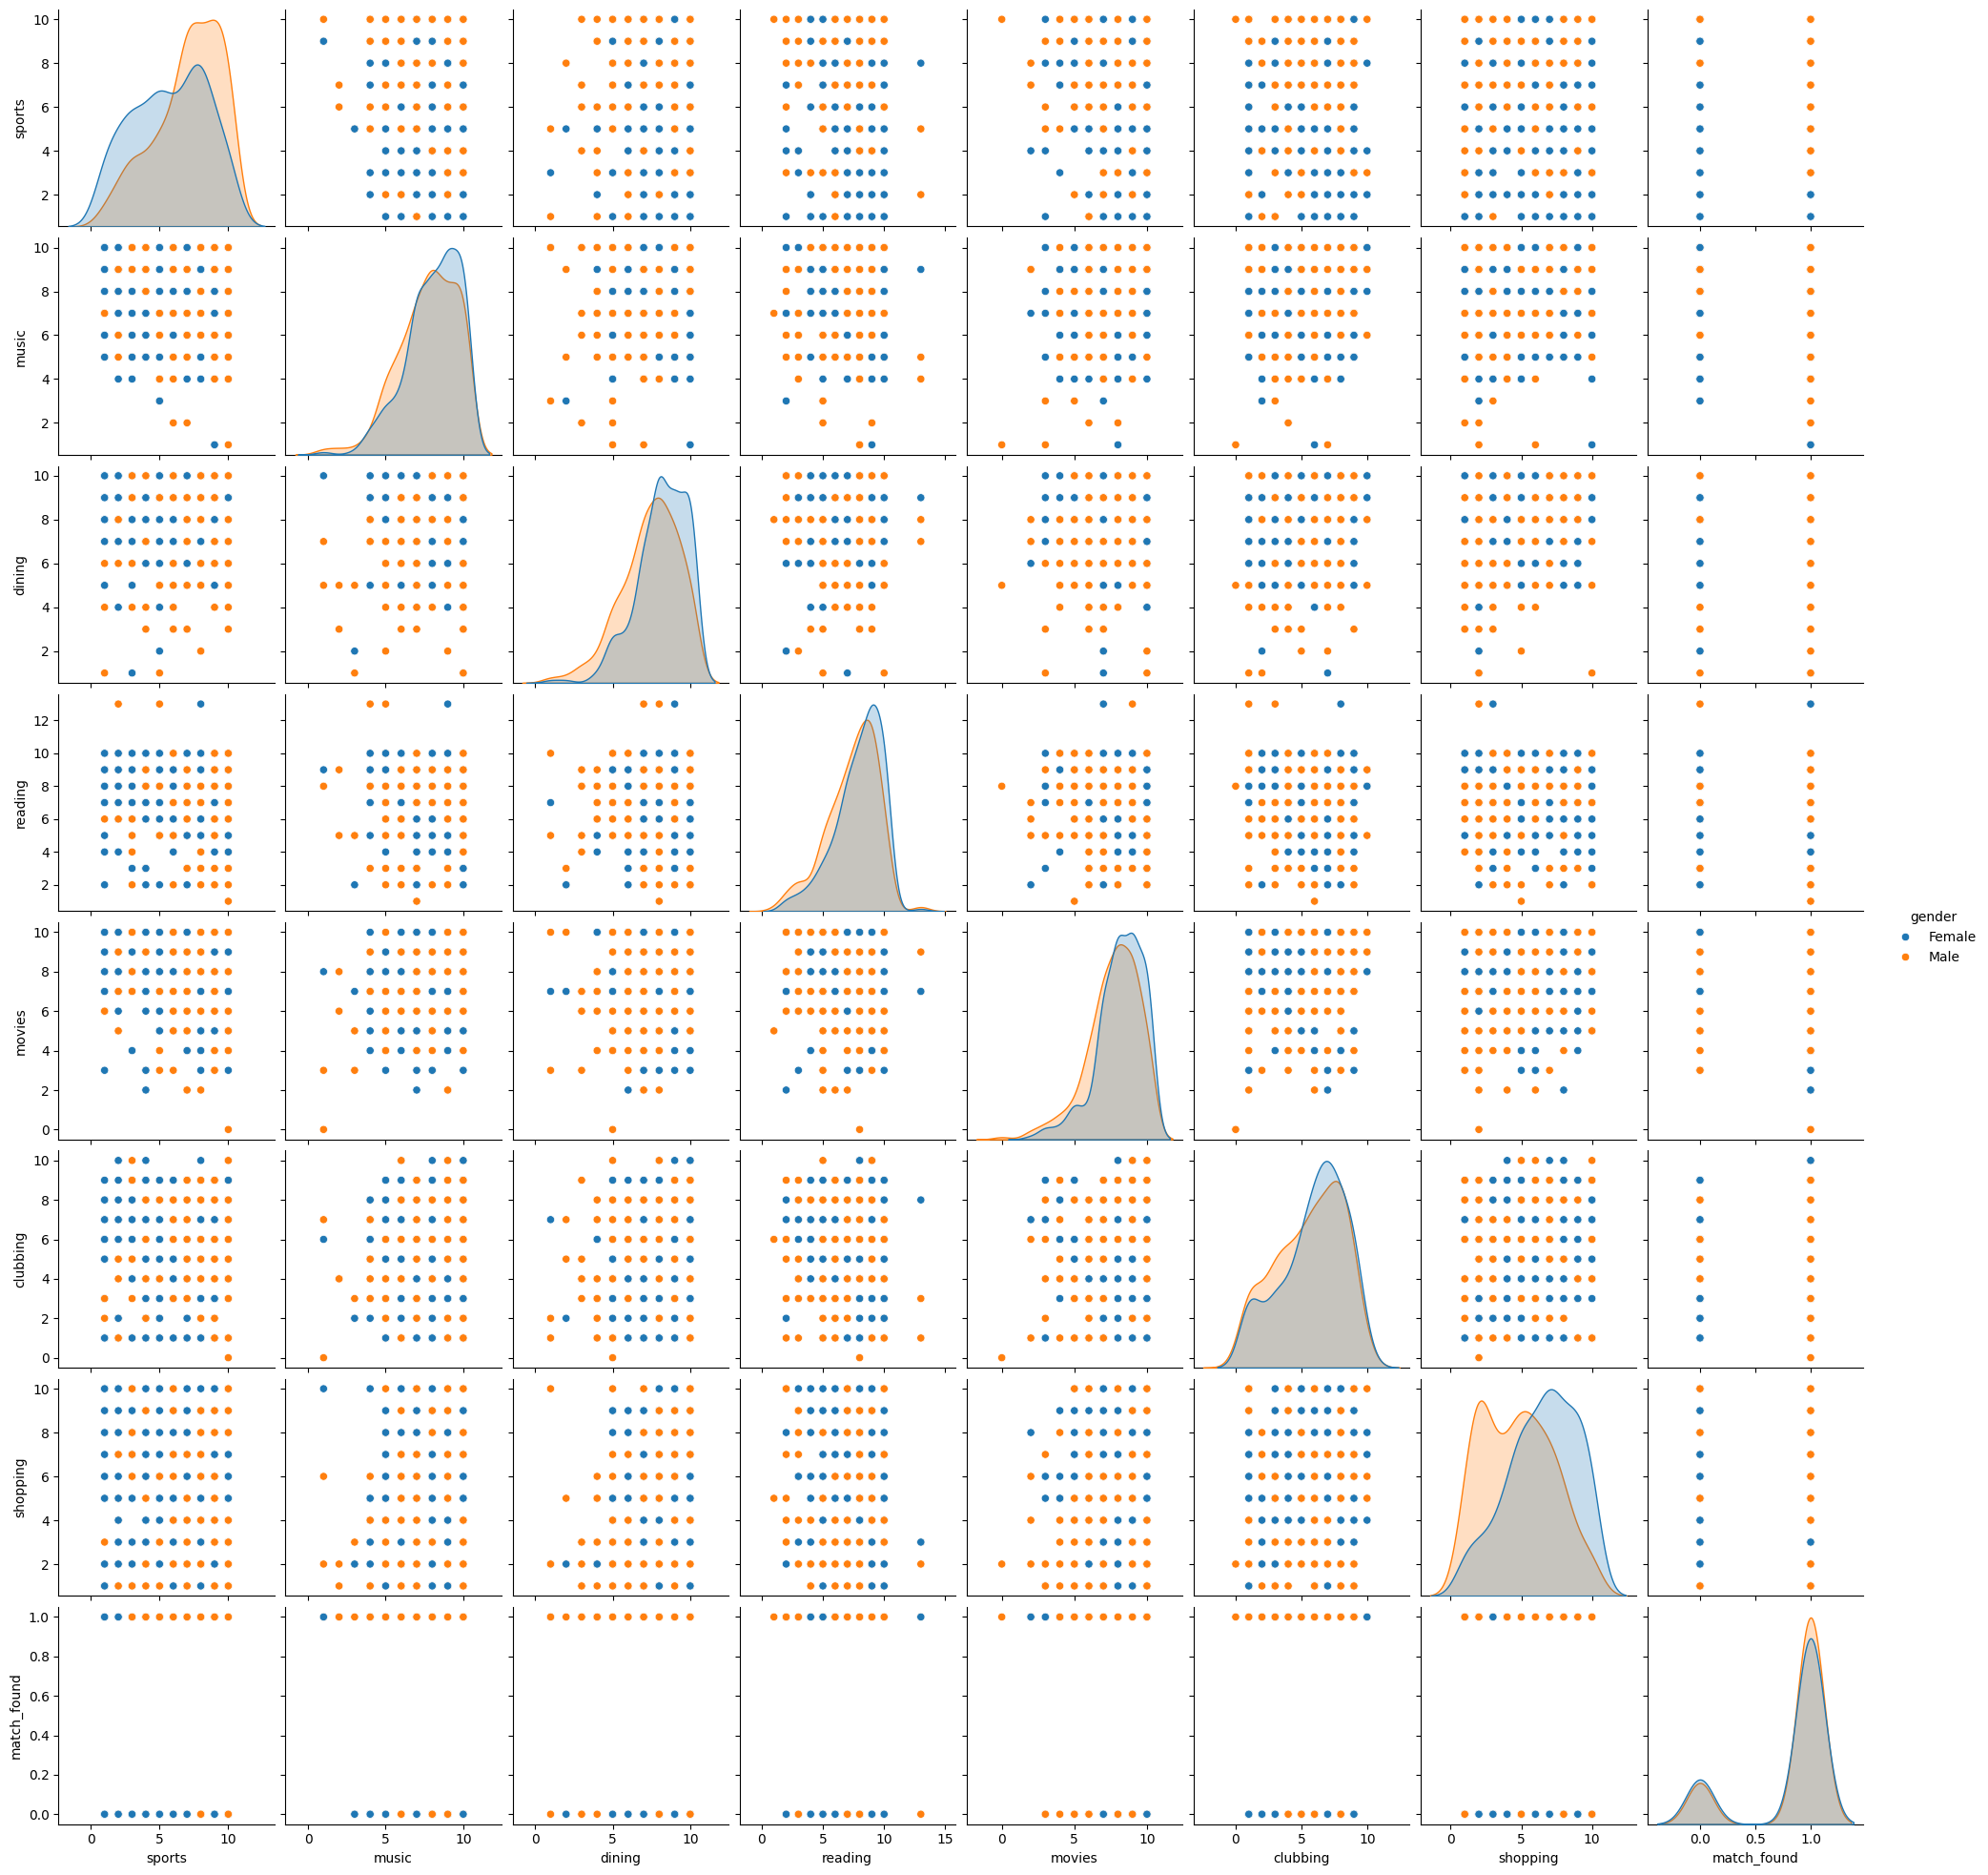

In [70]:
# Select interest-related columns, gender, and match_found
interests = ['sports', 'music', 'dining', 'reading', 'movies', 'clubbing', 'shopping']
variables = interests + ['match_found']

# Plot pairplot with interests, gender, and match_found as hue
sns.pairplot(speed_dating_events_analysis_data, hue='gender', vars=variables, diag_kind='kde')

plt.show()


Just for fun, I wanted to see how interests differed by gender. The pairplot above show that if you want to suggest a date that both genders are likely to enjoy, choose movies, shopping or dining.

## Models

Couple of different predictive models were applied. 

### Linear Regression
I'll run linear regression model to predict which feature is the best at predicting a match. Downside of this approach is model is limited to dealing with numeric values so categorial values need to be excluded. 

In [74]:
# Remove commas and convert the income column to float
speed_dating_events_analysis_data['income'] = speed_dating_events_analysis_data['income'].replace({',': ''}, regex=True).astype(float)

# OLS model with coefficients
X_ols = speed_dating_events_analysis_data[['income', 'imprace', 'imprelig', 'match_es', 'attr_rating']]
y_ols = speed_dating_events_analysis_data.match_found

# Fill NaN values with the mean of each column
X_ols = X_ols.fillna(X_ols.mean())

traits = sm.OLS(y_ols, X_ols)
results_traits = traits.fit()
results_traits.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            match_found   R-squared (uncentered):                   0.848
Model:                            OLS   Adj. R-squared (uncentered):              0.847
Method:                 Least Squares   F-statistic:                              610.5
Date:                Wed, 18 Sep 2024   Prob (F-statistic):                   7.14e-221
Time:                        18:09:11   Log-Likelihood:                         -207.76
No. Observations:                 551   AIC:                                      425.5
Df Residuals:                     546   BIC:                                      447.1
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
income       1.184e-06   1.03e-06      1.150      0.251   -8.39e-07    3.21e-06
imprace        -0.0096      0.006     -1.617      0.106      -0.021       0.002
imprelig        0.0061      0.006      1.016      0.310      -0.006       0.018
match_es        0.0459      0.007      6.776      0.000       0.033       0.059
attr_rating     0.1031      0.008     12.596      0.000       0.087       0.119
==============================================================================
Omnibus:                       87.117   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.225
Skew:                          -1.176   Prob(JB):                     1.43e-28
Kurtosis:                       3.236   Cond. No.                     2.75e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The most significant predictors of finding a match are self-assessed attractiveness(match_es) and others' ratings of attractiveness(attr_rating). Both have positive coefficients, indicating that higher attractiveness increases the chances of finding a match. 

### Logistic Regression
Logistic regression was picked over linear regression since for predicting categorial outcome(match or no match), the logistic regression is more useful.


Accuracy: 0.8738738738738738
Confusion Matrix:
 [[ 4 10]
 [ 4 93]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.29      0.36        14
           1       0.90      0.96      0.93        97

    accuracy                           0.87       111
   macro avg       0.70      0.62      0.65       111
weighted avg       0.85      0.87      0.86       111



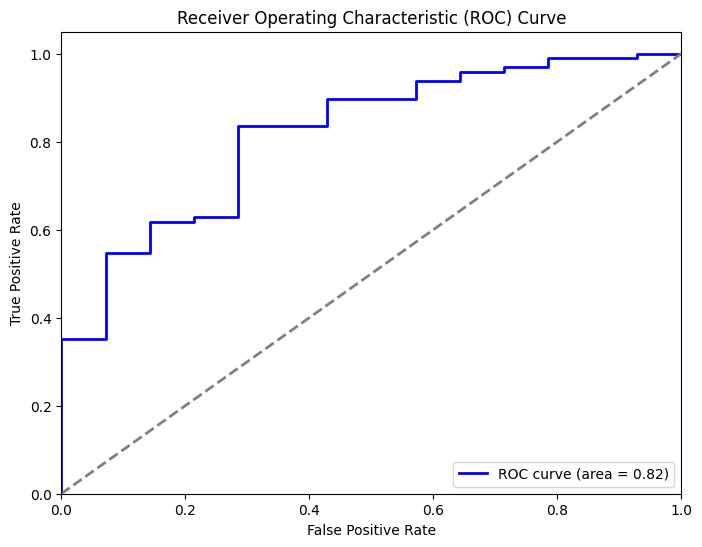

In [85]:
# Remove commas and convert the income column to float
speed_dating_events_analysis_data['income'] = speed_dating_events_analysis_data['income'].replace({',': ''}, regex=True).astype(float)

# Select features and target
X = speed_dating_events_analysis_data[['income', 'imprace', 'imprelig', 'match_es', 'attr_rating']]
y = speed_dating_events_analysis_data.match_found

# Impute missing values in X
imputer = SimpleImputer(strategy='mean')  # You can also use 'median', 'most_frequent', etc.
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increase the number of iterations
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Calculate the ROC curve and AUC
y_probs = model.predict_proba(X_test)[:, 1]  # Get the predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the AUC-ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


The model performs well when predicting matches (class 1), but struggles to correctly predict when no match is found (class 0). This imbalance is likely due to the small number of 0s in the dataset, which leads the model to favor predicting 1s more often, as shown by the higher recall and precision for class 1.


In [87]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[ 4 10]
 [ 6 91]]


The model performs well in predicting matches (1s) with high precision and recall. However, it struggles with predicting when there is no match (class 0), as indicated by the 10 false positives and 6 false negatives. The model is misclassifying a significant number of the negative cases, suggesting that it favors predicting matches over no matches.

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the model
knn = KNeighborsClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Experiment with different numbers of neighbors
    'weights': ['uniform', 'distance'],  # Weight options for neighbors
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Different distance metrics
}

# Set up the grid search
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score}")

# Evaluate on the test data
best_knn = grid_search.best_estimator_
test_predictions = best_knn.predict(X_test)

# Get accuracy and confusion matrix
test_accuracy = accuracy_score(y_test, test_predictions)
test_conf_matrix = confusion_matrix(y_test, test_predictions)

print(f"Test Accuracy: {test_accuracy}")
print(f"Confusion Matrix:\n {test_conf_matrix}")


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 0.8045454545454545
Test Accuracy: 0.8648648648648649
Confusion Matrix:
 [[ 4 10]
 [ 5 92]]


Tuning done

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Assuming X is your set of features
X = speed_dating_events_analysis_data[['income', 'imprace', 'imprelig', 'match_es', 'attr_rating']]
X = X.fillna(X.mean())  # Handle missing values

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


       Feature        VIF
0       income  10.292404
1      imprace   3.361563
2     imprelig   3.204059
3     match_es   2.802776
4  attr_rating  11.722763
